In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import os
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Device: {device}')

data_folder = Path("../../data")
dataset_location = data_folder / "creditcard.csv"

# Necessary for notebook to see src
import sys
sys.path.append('../..')

from src.visualization import tsne_visualization, pca_visualization

Device: cuda


In [2]:
original_dataset = pd.read_csv(dataset_location)
dataset = original_dataset.copy(deep=True)

In [3]:
dataset.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
# No null values

dataset.isna().sum().sum()

0

/tmp/ipykernel_223706/3054882882.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


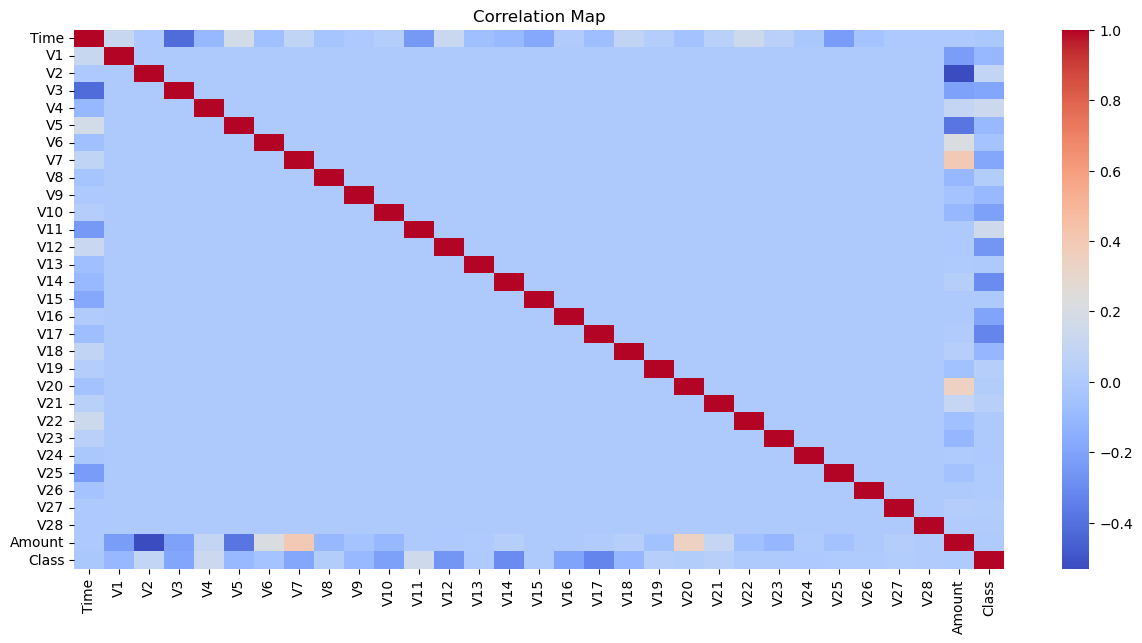

In [6]:
corr = dataset.corr()

fig = plt.figure(figsize=(15, 7))
ax = fig.subplots()
sns.heatmap(corr, annot=False, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Map')
fig.show()

/tmp/ipykernel_223706/2469110955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=dataset, palette='pastel', stat='probability')


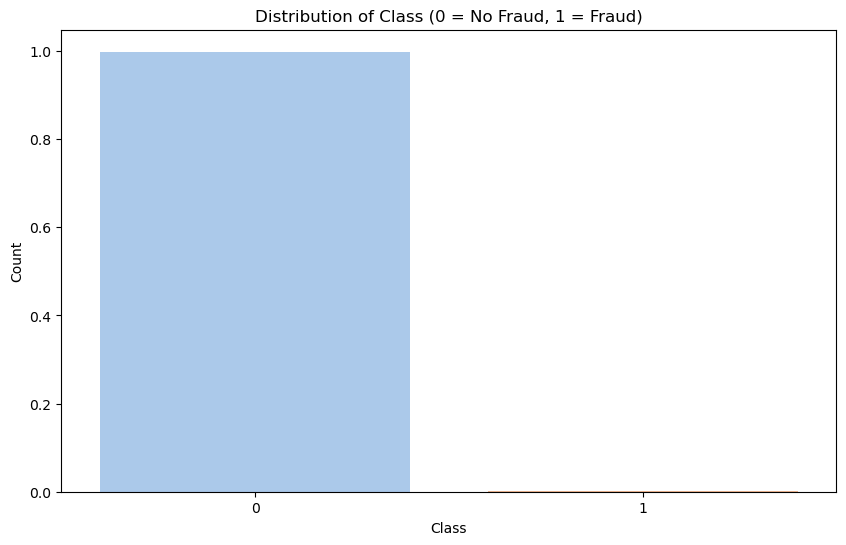

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=dataset, palette='pastel', stat='probability')
plt.title('Distribution of Class (0 = No Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Time', ylabel='Count'>

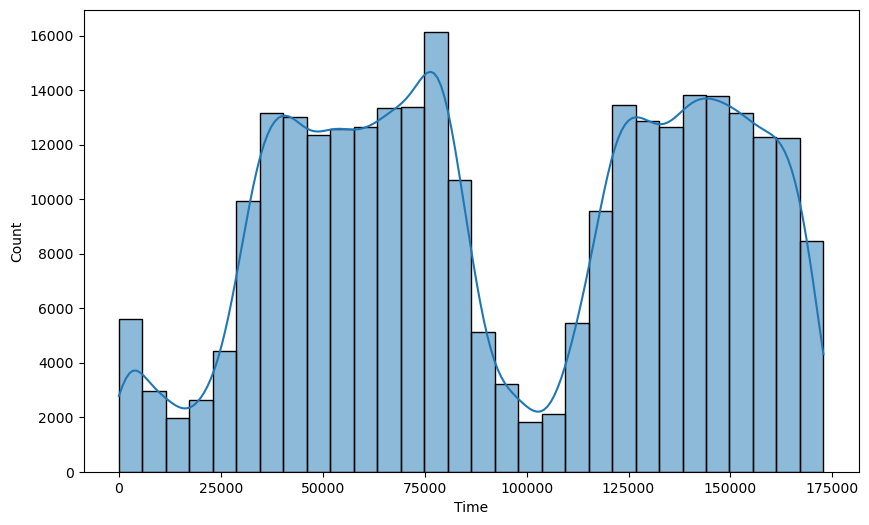

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset['Time'], kde=True, bins=30)

/tmp/ipykernel_223706/1106280740.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_fraud, x='Hour', y='Class', palette='viridis')


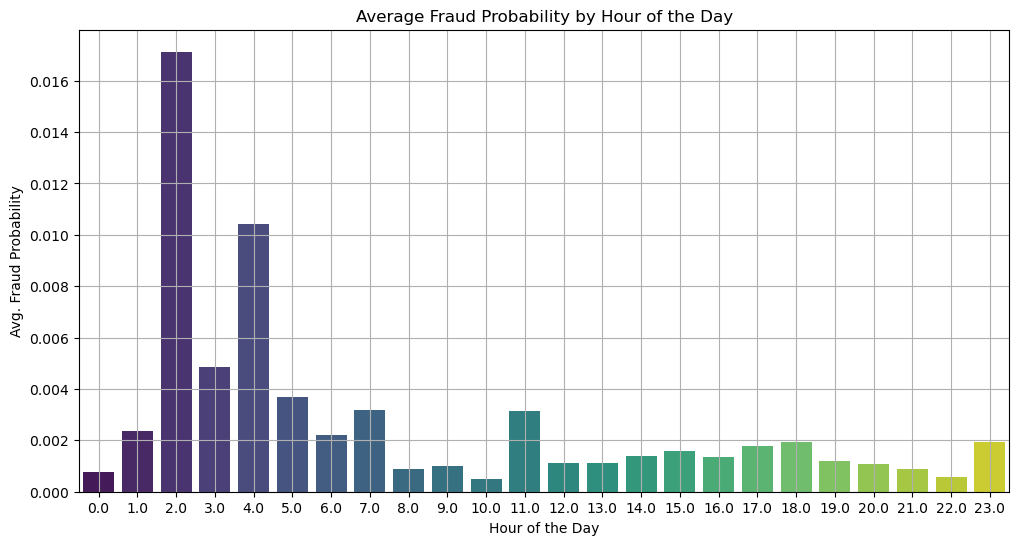

In [25]:
dataset['Hour'] = (dataset['Time'] //  3600) % 24

hour_fraud = dataset.groupby('Hour')['Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=hour_fraud, x='Hour', y='Class', palette='viridis')
plt.title('Average Fraud Probability by Hour of the Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Fraud Probability")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

/tmp/ipykernel_223706/2355466974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_fraud, x='Day', y='Class', palette='viridis')


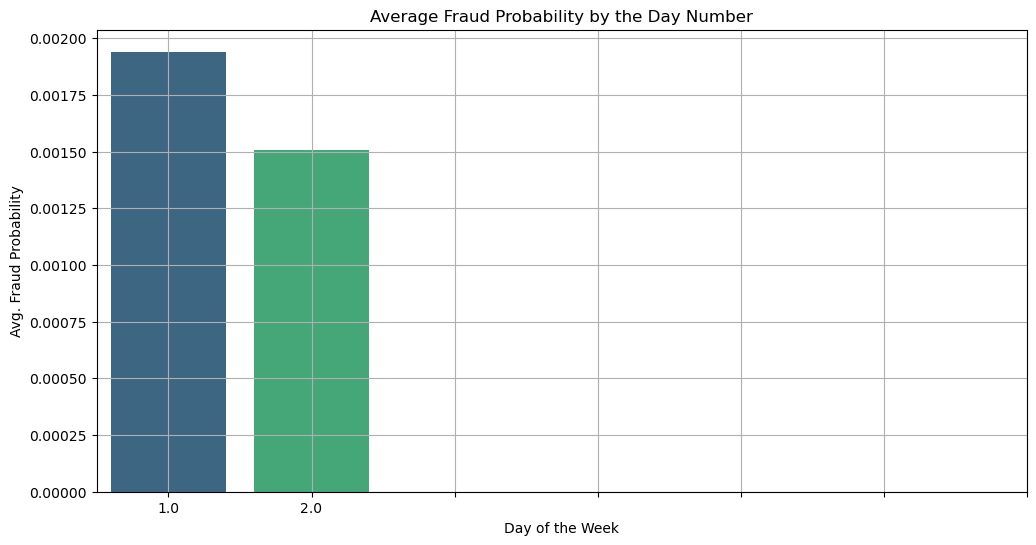

In [26]:
dataset['Day'] = (dataset['Time'] //  (3600 * 24)) % 7 + 1

day_fraud = dataset.groupby('Day')['Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=day_fraud, x='Day', y='Class', palette='viridis')
plt.title('Average Fraud Probability by the Day Number')
plt.xlabel("Day of the Week")
plt.ylabel("Avg. Fraud Probability")
plt.xticks(range(0, 7))
plt.grid()
plt.show()

/tmp/ipykernel_223706/439060195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_fraud, x='Minute of Hour', y='Class', palette='viridis')


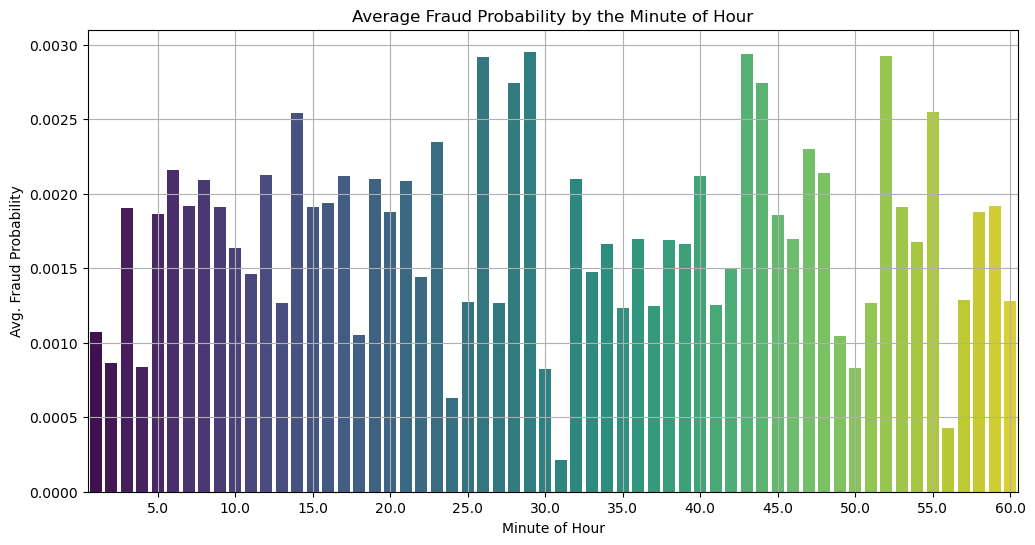

In [32]:
dataset['Minute of Hour'] = (dataset['Time'] %  60)+ 1

day_fraud = dataset.groupby('Minute of Hour')['Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=day_fraud, x='Minute of Hour', y='Class', palette='viridis')
plt.title('Average Fraud Probability by the Minute of Hour')
plt.xlabel("Minute of Hour")
plt.ylabel("Avg. Fraud Probability")
plt.xticks(range(4, 60, 5))
plt.grid()
plt.show()

/tmp/ipykernel_223706/1489309627.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = dataset.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)


Percentage of Fraudulent Transactions in Each Amount Range:
               Non-Fraud     Fraud
Amount Range                      
0-50           99.839223  0.160777
51-100         99.848879  0.151121
101-200        99.839686  0.160314
201-500        99.747768  0.252232
501-1000       99.595205  0.404795
1001-5000      99.701393  0.298607
5001-10000    100.000000  0.000000
10001+        100.000000  0.000000


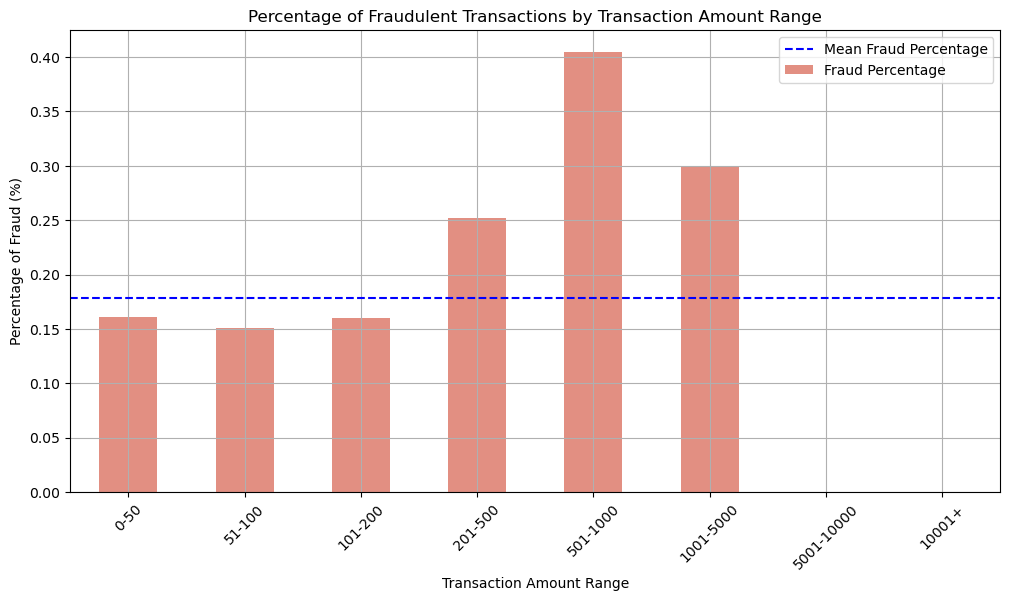

In [10]:
# calculate the percentage of fraudulent transactions in different ranges 
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000] 
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001+']
dataset['Amount Range'] = pd.cut(dataset['Amount'], bins=bins, labels=labels, right=False)

# calculate the counts of fraud in each amount range 
fraud_counts = dataset.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts =  fraud_counts * 100

# display the percentage of in each amount range
print("Percentage of Fraudulent Transactions in Each Amount Range:")
print(fraud_counts)

# plotting the percentage of fraudulent transactions in each amount range
plt.figure(figsize=(12, 6))
fraud_counts['Fraud'].plot(kind='bar', color='#d6604d', alpha=0.7, label='Fraud Percentage')
plt.title('Percentage of Fraudulent Transactions by Transaction Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Percentage of Fraud (%)')
plt.xticks(rotation=45)
plt.grid()
plt.axhline(y=fraud_counts['Fraud'].mean(), color='blue', linestyle='--', label='Mean Fraud Percentage')
plt.legend()
plt.show()


In [11]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour', 'Amount Range'],
      dtype='object')